In [1]:
import random

In [2]:
# matplotlib notebook
# import matplotlib
# matplotlib.use('TkAgg')

In [3]:
from common import Item
from ortools_models import task_one_model, task_one_model_adapter
from skyline import skyline_decode
from plots import draw_pallet
from metrics import print_efficiency

In [4]:
items = [Item(random.randint(1, 5), random.randint(1, 5), random.randint(1, 5)) for _ in range(12)]
items

[Item(4, 3, 1),
 Item(5, 1, 3),
 Item(1, 1, 5),
 Item(4, 3, 1),
 Item(2, 2, 3),
 Item(5, 3, 1),
 Item(1, 2, 1),
 Item(1, 2, 4),
 Item(1, 3, 1),
 Item(4, 1, 3),
 Item(2, 2, 2),
 Item(4, 4, 5)]

In [5]:
exRes = task_one_model(10, 10, items, limit=30 * 1000)
exRes

(0,
 20.0,
 20.0,
 [Position(6.0, 0.0, False),
  Position(0.0, 2.0, True),
  Position(9.0, 9.0, False),
  Position(5.999999999999999, 3.000000000000001, True),
  Position(8.0, 7.000000000000003, False),
  Position(2.0, 4.0, True),
  Position(0.0, 0.0, False),
  Position(6.0, 9.000000000000004, True),
  Position(5.0, 7.0, False),
  Position(1.0, 9.0, False),
  Position(0.0, 6.9999999999999885, False),
  Position(2.0, 0.0, False)])

In [6]:
skRes = skyline_decode(10, 10, items, range(len(items)))
skRes

(20,
 [Position(0, 0, False),
  Position(0, 3, False),
  Position(5, 3, False),
  Position(4, 0, False),
  Position(8, 0, False),
  Position(0, 4, False),
  Position(8, 2, True),
  Position(4, 7, True),
  Position(5, 4, False),
  Position(6, 3, False),
  Position(0, 7, False),
  Position(6, 4, False)])

D:\yadisk\projects\pallet-packing\plots.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


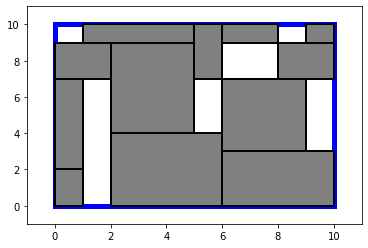

In [7]:
draw_pallet(10, 10, items, exRes[3])

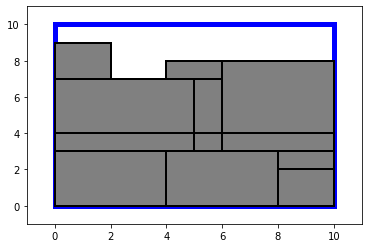

In [8]:
draw_pallet(10, 10, items, skRes[1])

In [9]:
print('Solver:')
print_efficiency(10,10,items,task_one_model_adapter)
print('Skyline:')
skyline_decode_adapter=lambda w,h,its:skyline_decode(w,h,its,range(len(its)))
print_efficiency(10,10,items,skyline_decode_adapter)

Solver:
Execution took: 2.626150131225586 seconds
Result is: 20 - 20.00% of pallet used
Skyline:
Execution took: 0.0 seconds
Result is: 20 - 20.00% of pallet used
